# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [94]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df


,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,TotalEBCT,Footprint,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,57.886530,Cascade,1.880000,1.388889,NaN,143.341204,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,63.521586,Air injection,1.620000,11.204508,33.20,16.714412,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,64.908486,Bottom aeration,2.213333,3.935020,28.97,44.693822,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,NaN,Cascade,2.073333,NaN,NaN,194.588021,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,NaN,Cascade,1.313333,NaN,NaN,412.300024,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,91.698648,Cascade,1.546667,5.242647,40.86,24.106636,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,89.405620,Passive plate aerator,2.133333,6.912876,16.49,22.050800,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,19.331598,Bottom aeration,1.673333,2.824380,36.11,209.076387,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,NaN,Cascade,2.200000,NaN,NaN,152.513970,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

<h2> Solution: </h2>


First we remove the unnecessary name column 'WaterworksName' and visualize the percentage of missing data for each feature. We can observe that the percentage of missing data ranges from 5% all the way up to 64% in 'UniformityCoefficient'.
We remove the features with more than 30% of data missing as they might introduce bias if we try to impute such a high percentage.
A heatmap visualising missing values is shown as well and can be used to find correlation between the missing data points. The yellow rectangles represent missing data. We can pick up on certain patterns here, such as missing <i> MaxTypicalValue </i> values allign with missing <i> FilterExploitation </i> values. It seems all categorical values are intact and there are only numerical values missing.

UniformityCoefficient        64.56
SumOfld_layer                49.37
TotalEBCT                    49.37
AverageFilterBedVolume       43.04
OverallFilterGrainSizeMin    43.04
OverallFilterGrainSizeMax    43.04
AverageTotalFilterDepth      41.77
TankExploitation             37.97
HLR_BW                       34.18
Stage1HLR                    26.58
MaxTypicalFlow               20.25
FilterExploitation           20.25
BW%                          16.46
AverageBackwashVolume        12.66
UFRV                          8.86
TankCapacity                  5.06
Footprint                     5.06
AverageFilterArea             5.06
AverageTypicalRunVolume       2.53
GravityPressureMixed          0.00
Stages                        0.00
TotalFilters                  0.00
OxygenFactor                  0.00
AerationType                  0.00
PrimaryTrigger                0.00
AbstractedVolume              0.00
dtype: float64

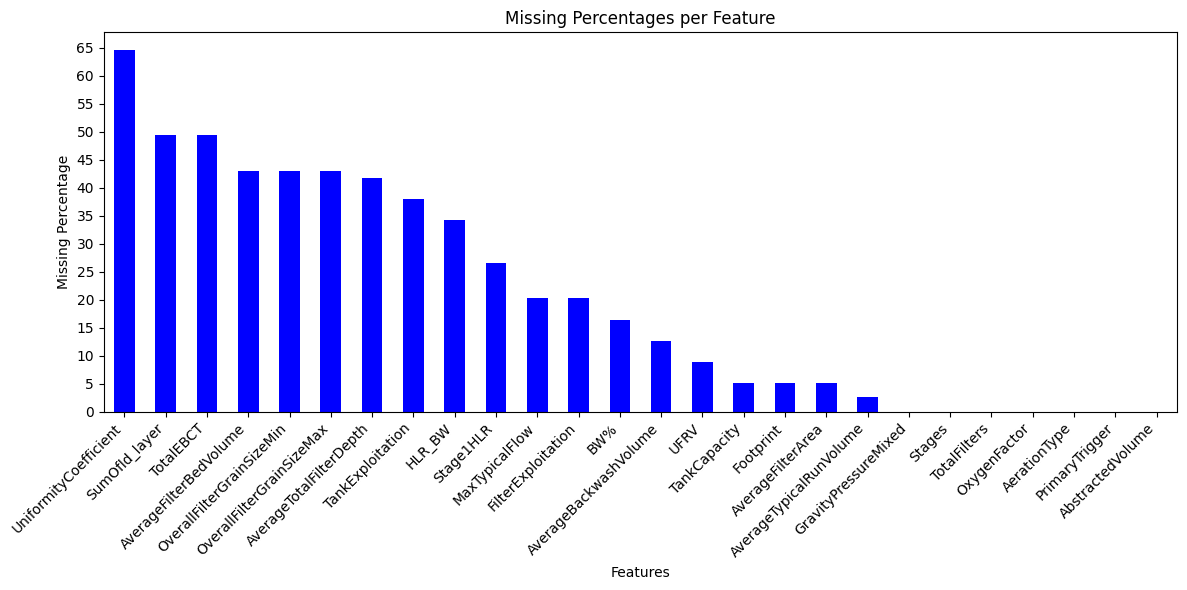

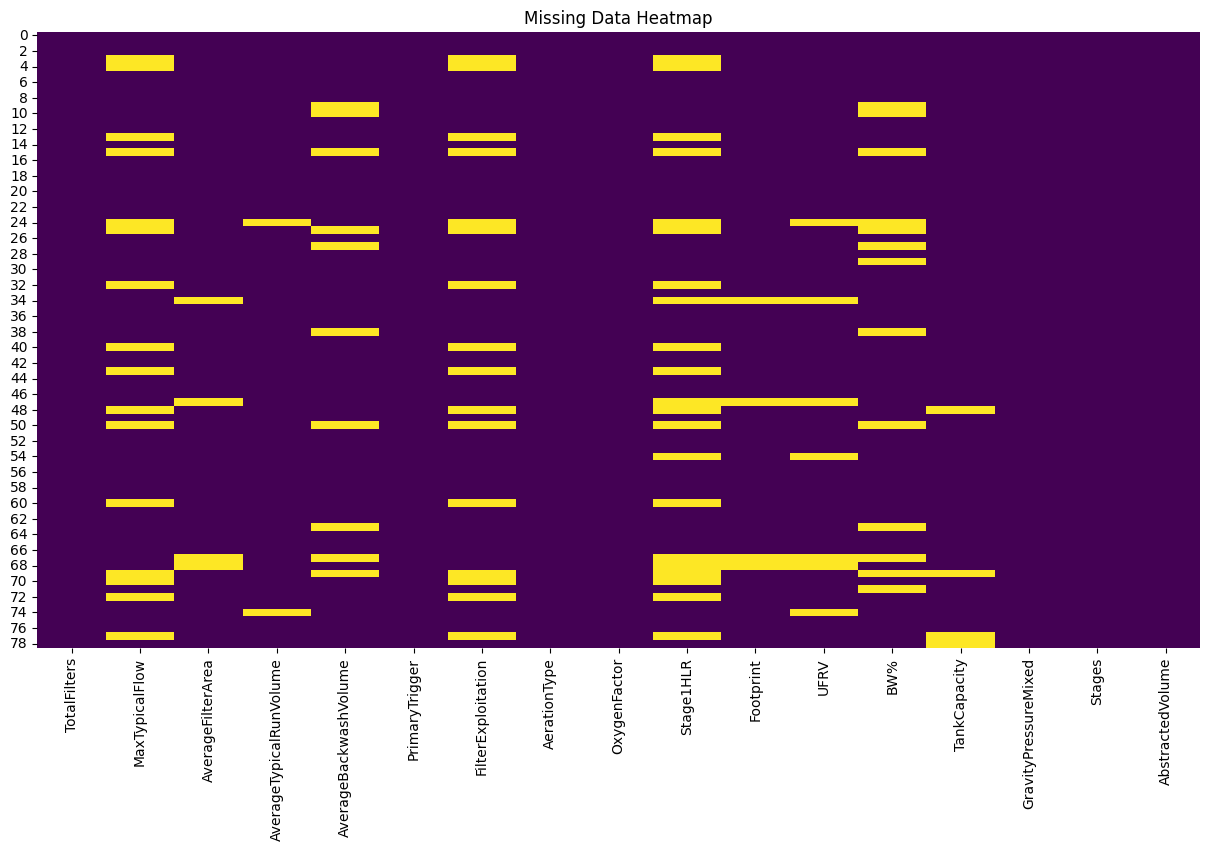

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


#remove irrelevant columns: WaterworksName
removedNamesDf = df.drop(columns=['WaterworksName'])

# Calculate the percentage of missing values per feature
missing_percentages_per_feature = removedNamesDf.isnull().mean().round(4) * 100

#Order missing percentages by descending order
missing_percentages_per_feature = missing_percentages_per_feature.sort_values(ascending=False)

display(missing_percentages_per_feature)

# Create a bar graph for missing percentages per feature
plt.figure(figsize=(12, 6))
missing_percentages_per_feature.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Missing Percentages per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.yticks(range(0, 70, 5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop columns with more than 30% missing values
relevantColumnsDf = removedNamesDf.drop(columns=missing_percentages_per_feature[missing_percentages_per_feature > 30].index)
# display(relevantColumnsDf)

# Show heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(relevantColumnsDf.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



Next, we scale the data. First we calculate the skewness of the data (only the features with numerical data) and print it out in a table. We can observe that one feature is approximately symmetric (FilterExploitation), one is negatively skewed (OxygenFactor) and all the rest are positively skewed. The three pairs of boxplots and distribution graphs show the comparison between different scaling techniques on the dataset. 
- The first - MinMaxScaler scales the numerical features to a range of 0 to 1. However, we can see that the data has some extreme outliers and therefore we might be losing resolution, since the outliers can disproportionately affect the process. 
- The second - StandardScaler scales the numerical features to have a mean of 0 and a standard deviation of 1. This scaler might also not be ideal in this situation as it expects a normal distribution pattern and is sensitive to outliers as the scaling depends on the mean. For both MinMax and Standard scalers, the distribution graph shows the skewness of the data very nicely nad confirms that only FilterExploitation is relatively symmetrical.
- The third - RobustScaler might be the best choice in this case as it using median and interquartile range (IQR) instead of mean and standard deviation. This make it more resilient to the outliers in the data than the previous two scalers. It is harder to read the boxplot and distribution graph for the RobustScaler as the extreme outliers are kept 'extreme'.
<i>https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e</i>

For demonstration purposes, we will use the MinMax scaler in the further processing of the data as it does not introduce any negative values that are undesirable for sqr or log transformation in the following steps. It also allows for better observation of the adjusted skewness.
 

+-------------------------+-------------------------+------------------+
| Name                    | Skewness                |   Skewness value |
+=========================+=========================+==================+
| AverageTypicalRunVolume | Positively Skewed       |        5.07952   |
+-------------------------+-------------------------+------------------+
| BW%                     | Positively Skewed       |        4.42535   |
+-------------------------+-------------------------+------------------+
| AbstractedVolume        | Positively Skewed       |        4.3957    |
+-------------------------+-------------------------+------------------+
| Footprint               | Positively Skewed       |        3.06068   |
+-------------------------+-------------------------+------------------+
| MaxTypicalFlow          | Positively Skewed       |        2.9157    |
+-------------------------+-------------------------+------------------+
| TankCapacity            | Positively Skewed      

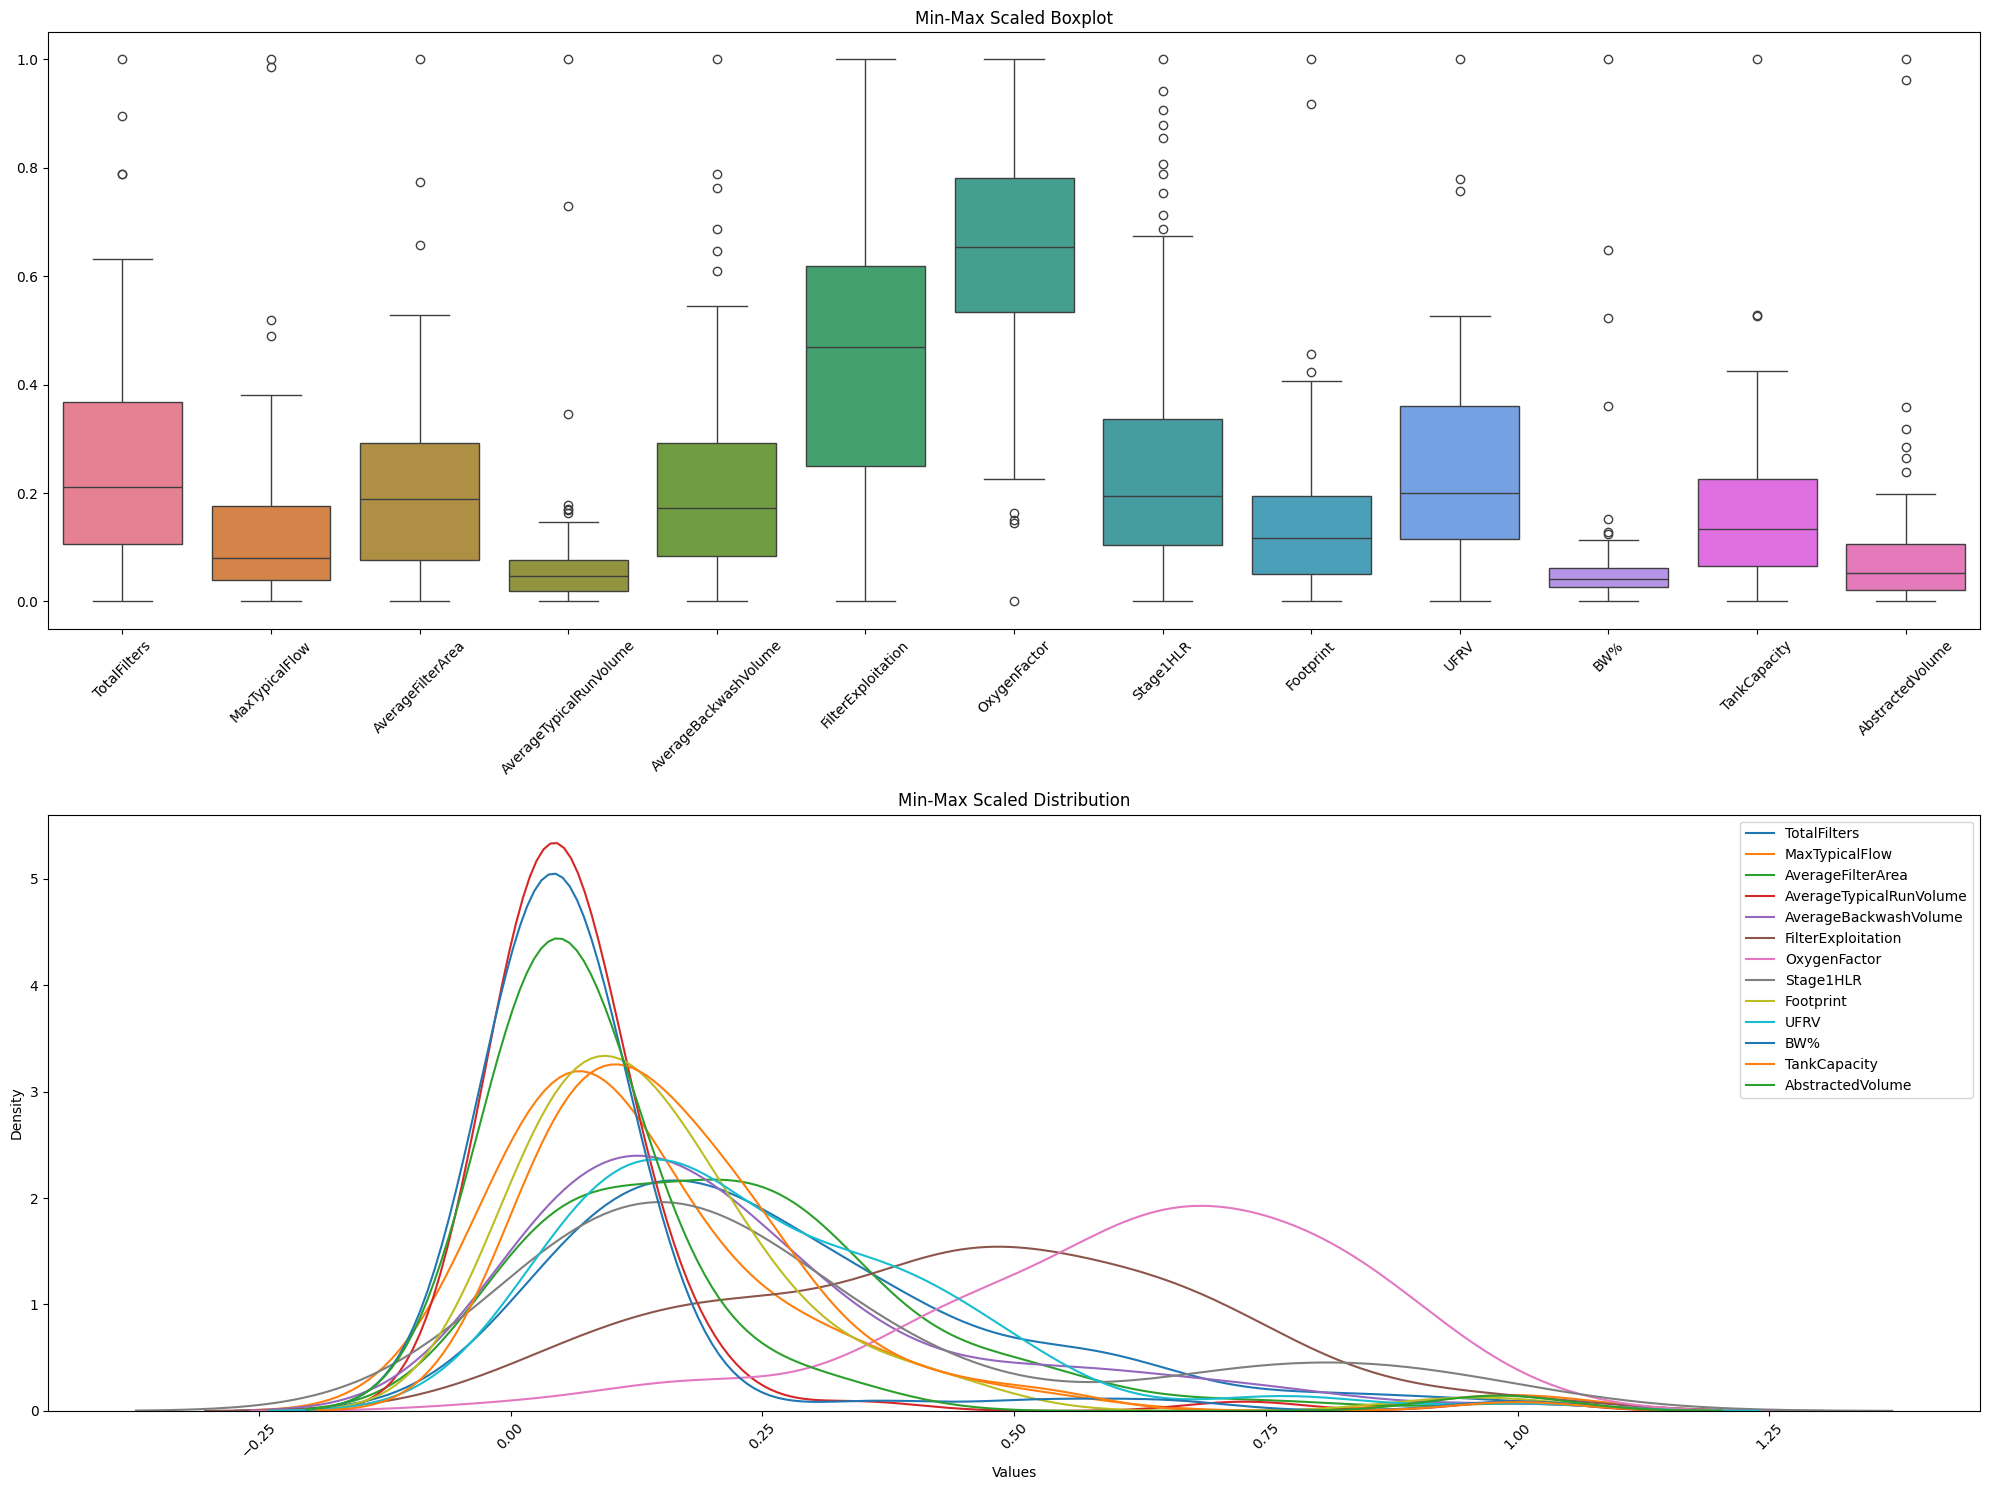

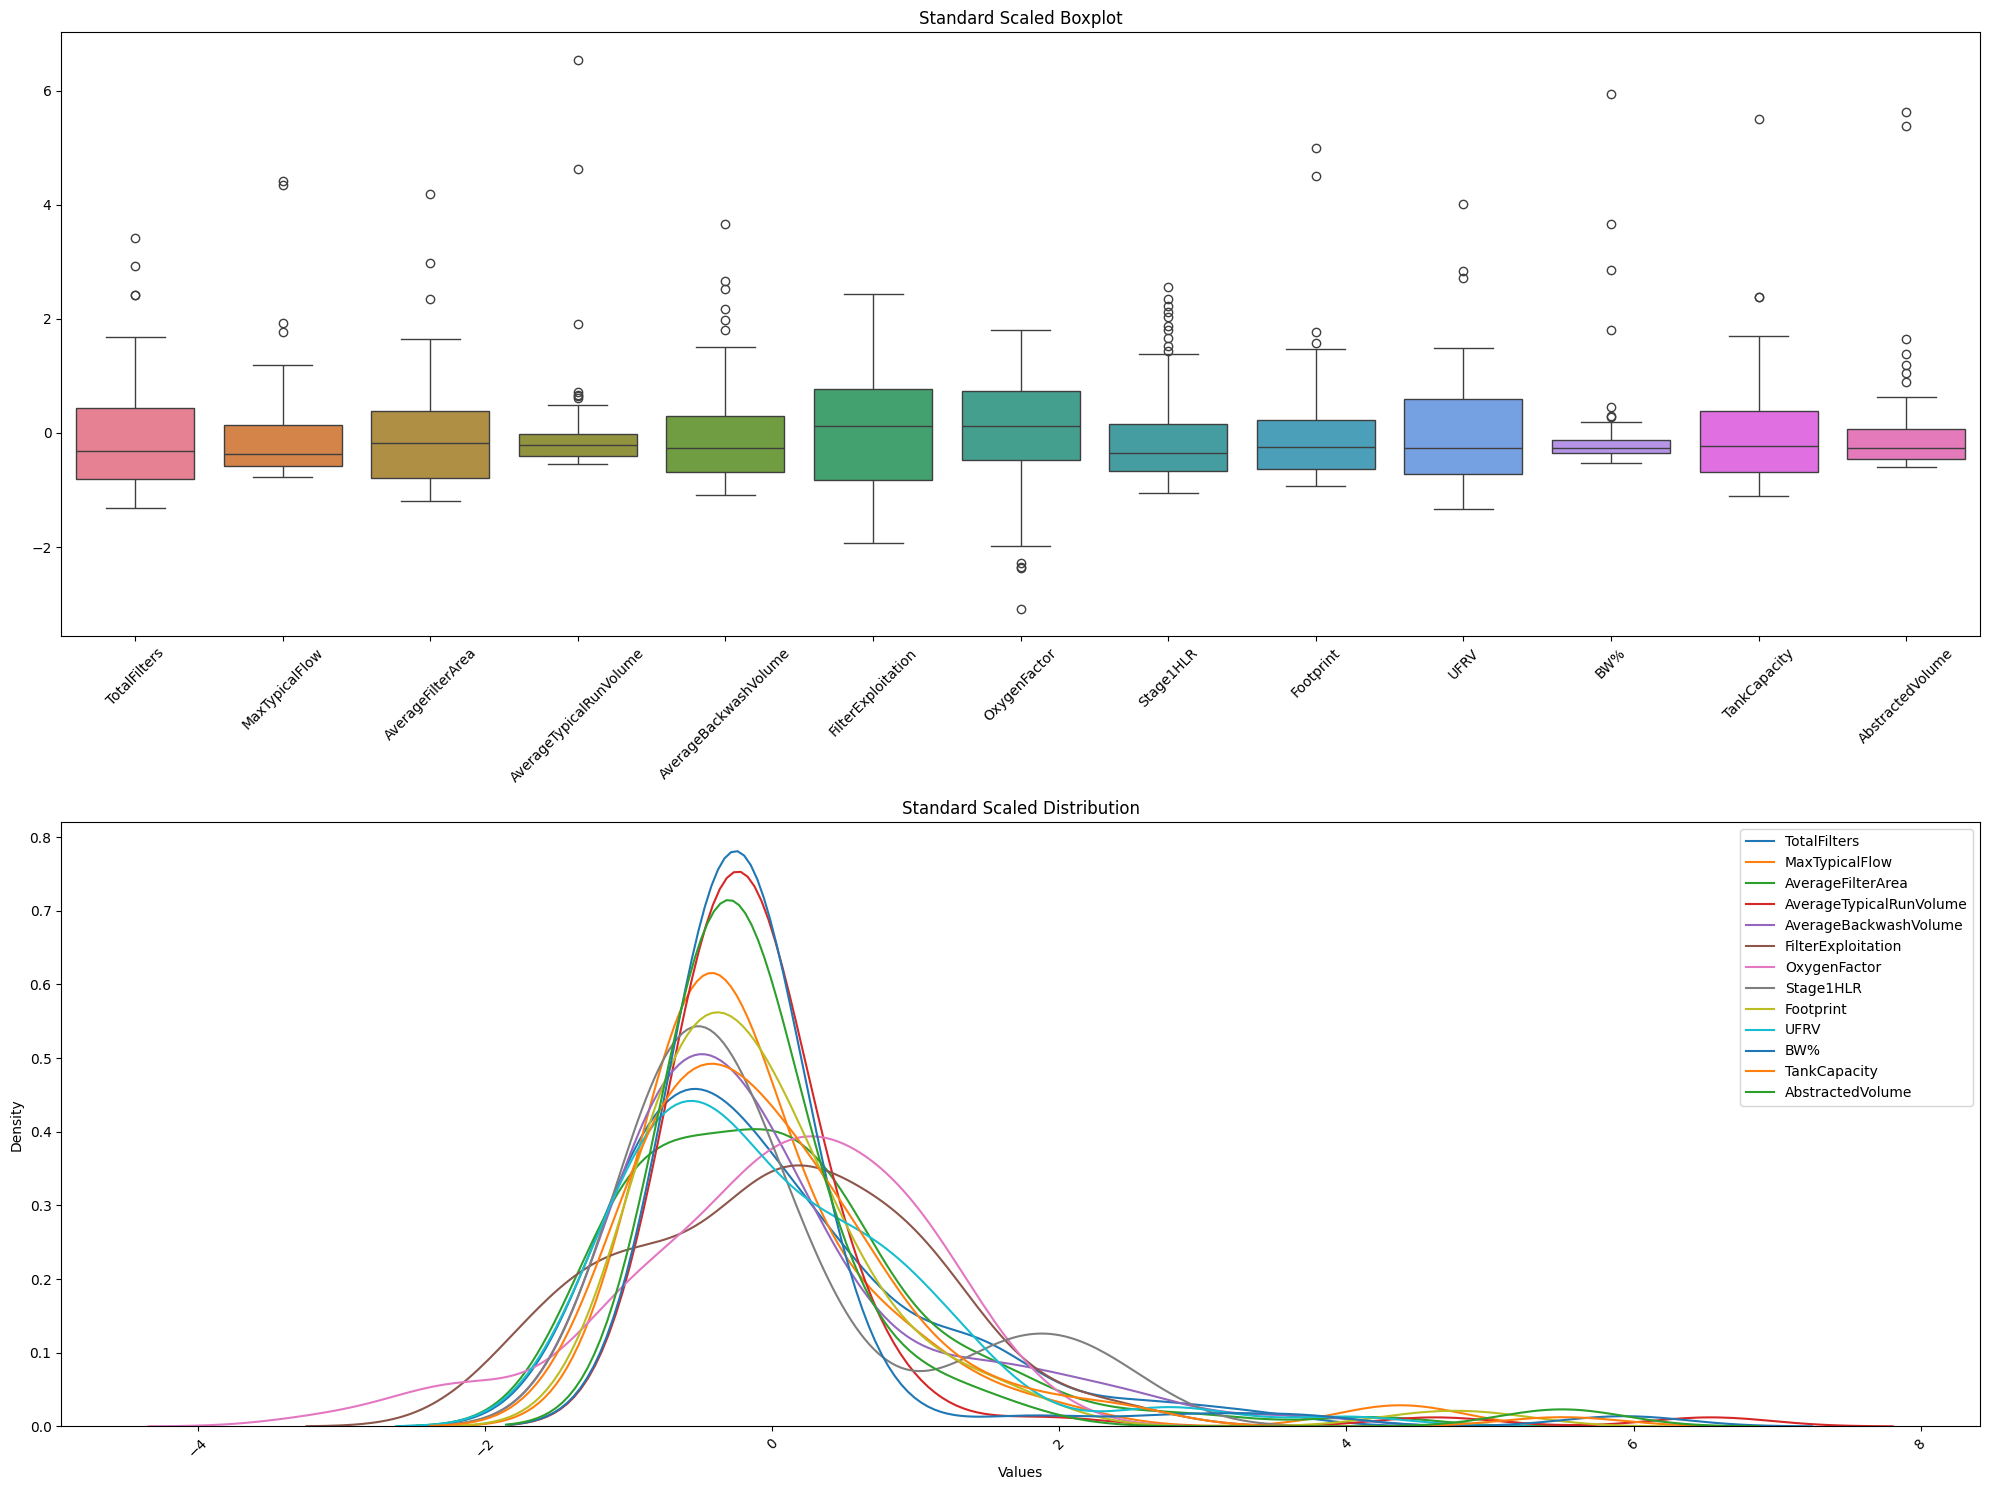

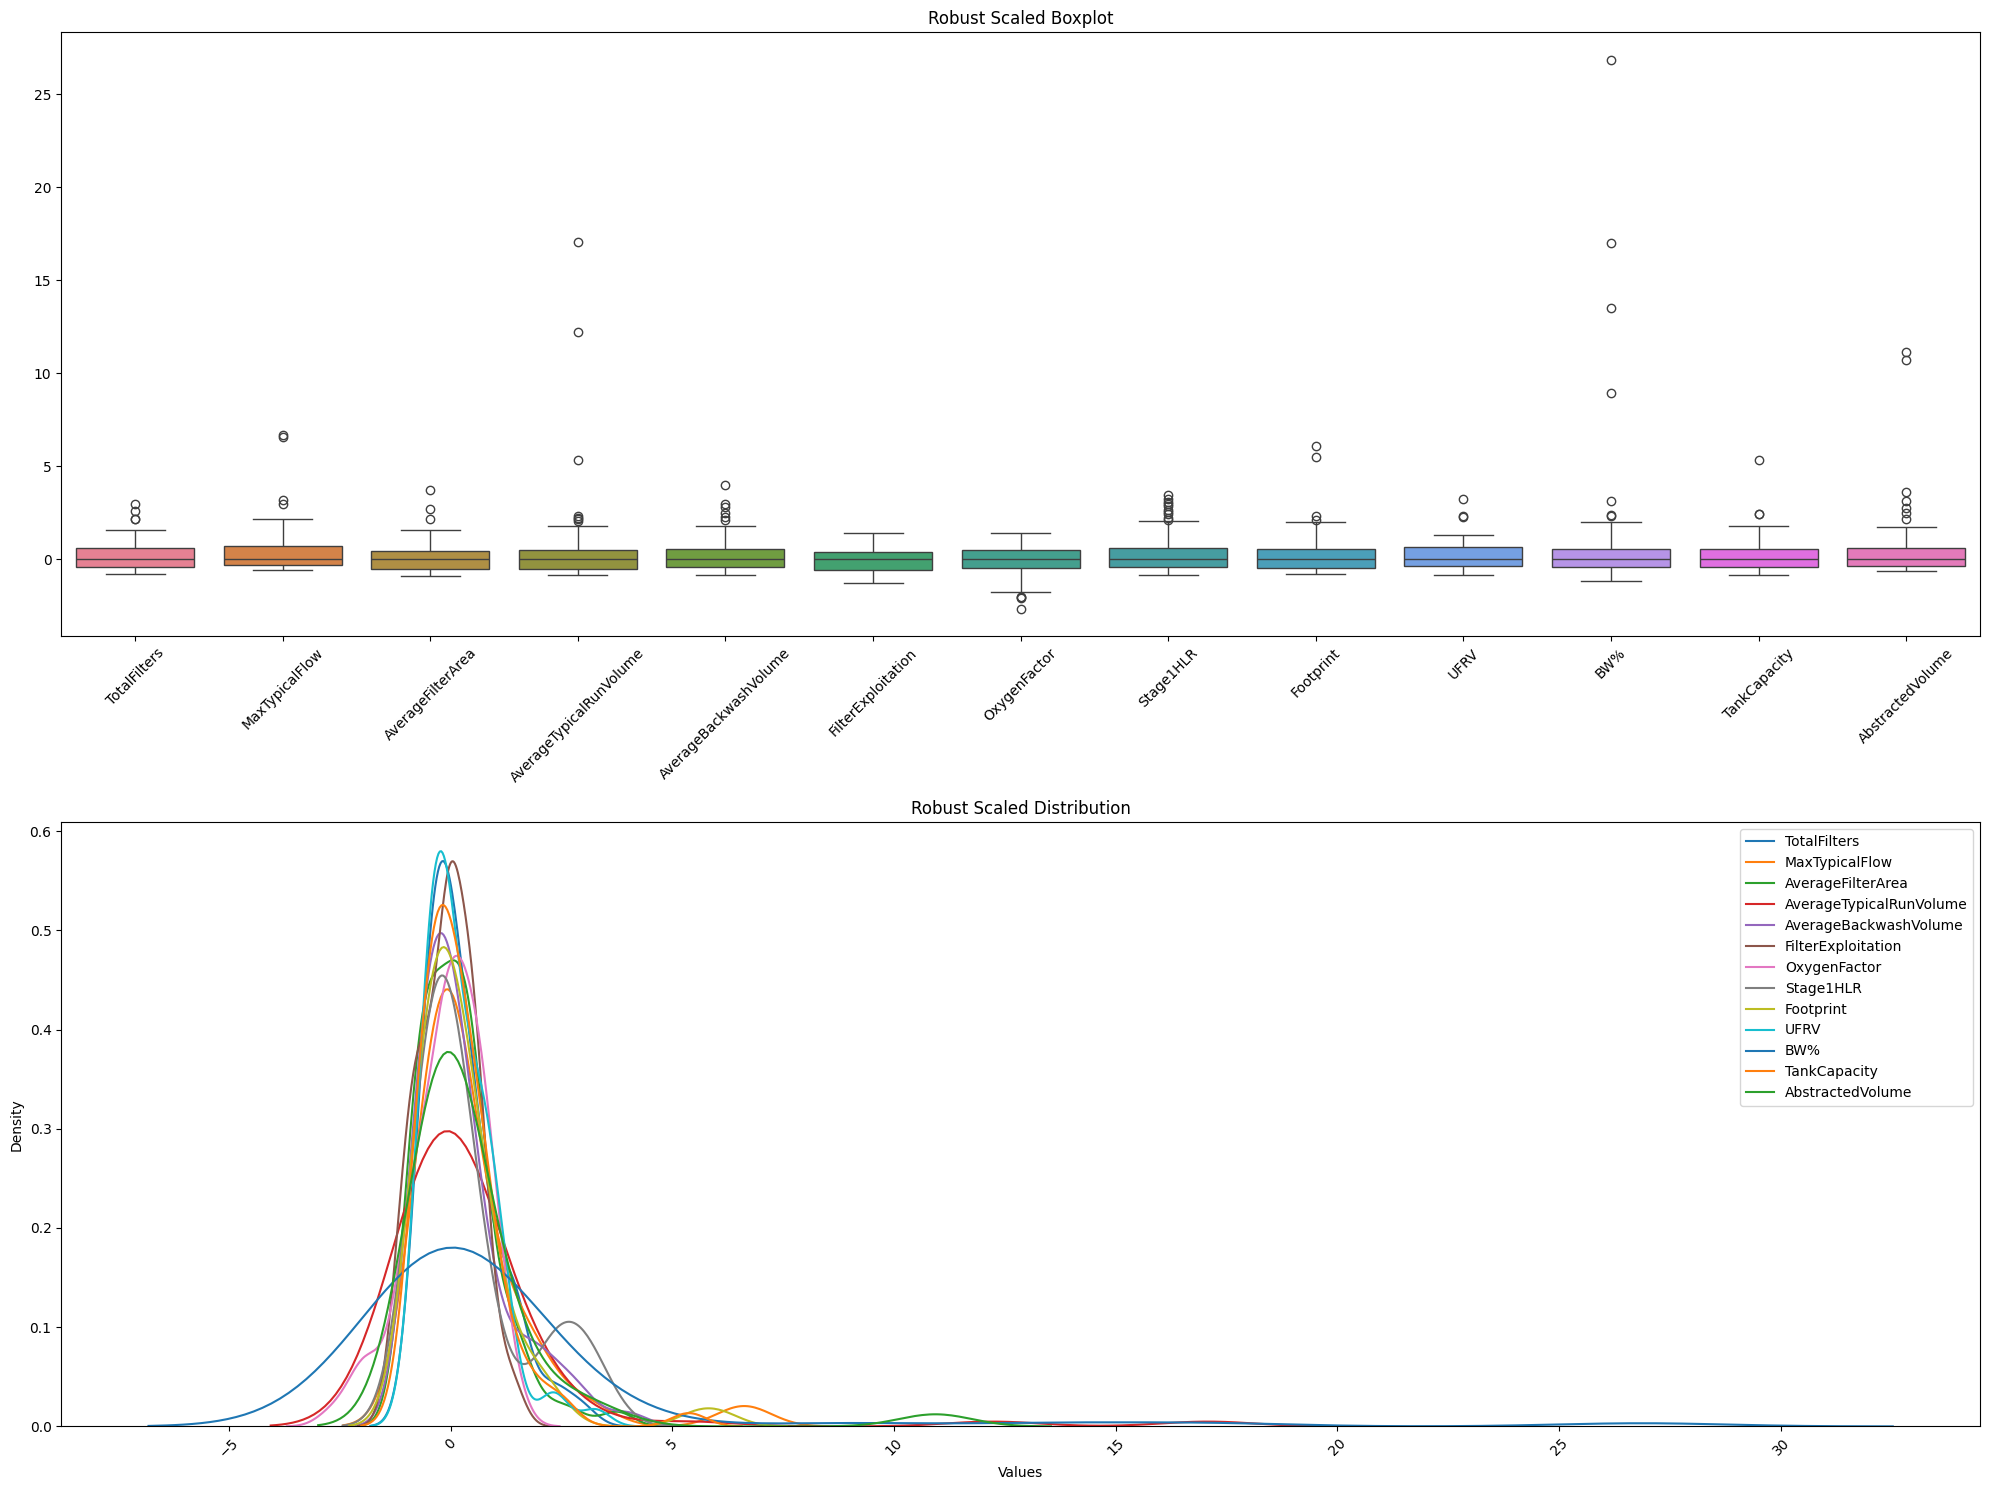

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import seaborn as sns
from tabulate import tabulate


numeric_columns = relevantColumnsDf.select_dtypes(include=['number'])
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Transform data
min_max = min_max_scaler.fit_transform(numeric_columns)
standard = standard_scaler.fit_transform(numeric_columns)
robust = robust_scaler.fit_transform(numeric_columns)

min_max_df = pd.DataFrame(min_max, columns=numeric_columns.columns)
standard_df = pd.DataFrame(standard, columns=numeric_columns.columns)
robust_df = pd.DataFrame(robust, columns=numeric_columns.columns)

# Plotting boxplots
# Calculate skewness for each feature in the DataFrame
skewness = numeric_columns.apply(lambda x: x.skew())

# Categorize skewness
# Skewness values between -0.5 and 0.5 are considered approximately symmetric
# Skewness values less than -0.5 are considered negatively skewed
# Skewness values greater than 0.5 are considered positively skewed

# Categorize skewness
categorized_skewness = {}
for feature, skew in skewness.items():
    if skew < - 0.5:
        categorized_skewness[feature] = ('Negatively Skewed', skew)
    elif skew > 0.5:
        categorized_skewness[feature] = ('Positively Skewed', skew)
    else:
        categorized_skewness[feature] = ('Approximately Symmetric', skew)

# Convert categorized skewness to list of tuples for tabulate
skewness_table = [(feature, category, skew) for feature, (category, skew) in categorized_skewness.items()]

# Order the features based on their skewness values
ordered_skewness_table = sorted(skewness_table, key=lambda x: abs(x[2]), reverse=True)

# Print as table
print(tabulate(ordered_skewness_table, headers=["Name", "Skewness", "Skewness value"], tablefmt="grid"))

# Plotting boxplots and distribution plots

# Min-Max Scaled Data
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
sns.boxplot(data=min_max_df)
plt.title('Min-Max Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in min_max_df.columns:
    sns.kdeplot(min_max_df[column], label=column)
plt.title('Min-Max Scaled Distribution')
plt.xlabel('Values')  
plt.ylabel('Density') 
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Standard Scaled Data
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
sns.boxplot(data=standard_df)
plt.title('Standard Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in standard_df.columns:
    sns.kdeplot(standard_df[column], label=column)
plt.title('Standard Scaled Distribution')
plt.xlabel('Values')  
plt.ylabel('Density') 
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Robust Scaled Data
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
sns.boxplot(data=robust_df)
plt.title('Robust Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in robust_df.columns:
    sns.kdeplot(robust_df[column], label=column)
plt.title('Robust Scaled Distribution')
plt.xlabel('Values')  
plt.ylabel('Density') 
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 From the previous step, we have an overview of the skewness of each feature, therefore we can split the data into 3 groups (there are no lightly positively skewed features):
 - Highly positively skewed - features with positive skewness > 1 
 - Relatively symmetric - features with skewness between -0.5 and 0.5 (FilterExploitation)
 - Negatively skewed - features with negative skewness > -0.5 (OxygenFactor)

We use log transformation for data with high positive skewness. We don't tranform the relatively symmetric data. We also don't transform the negatively skewed data either as it would require further processing. When sqr and log transform were tested on the negatively skewed feature, the negative skewness increased in both cases. 
The updated skewness table along with a boxplot and distribution graph show that we succesfully reduced the skew in the data. The skewness is however still more than 1 in multiple features, so there might be an argument for further transformation.




Highly skewed: ['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity', 'AbstractedVolume']
Slightly skewed: []
Negatively skewed: ['OxygenFactor']
Relatively symmetric: ['FilterExploitation']
+-------------------------+-------------------------+------------------+
| Name                    | Skewness                |   Skewness value |
+=========================+=========================+==================+
| AverageTypicalRunVolume | Positively Skewed       |        4.41872   |
+-------------------------+-------------------------+------------------+
| BW%                     | Positively Skewed       |        3.95046   |
+-------------------------+-------------------------+------------------+
| AbstractedVolume        | Positively Skewed       |        3.66941   |
+-------------------------+-------------------------+------------------+
| MaxTypicalFlow          | Positively Ske

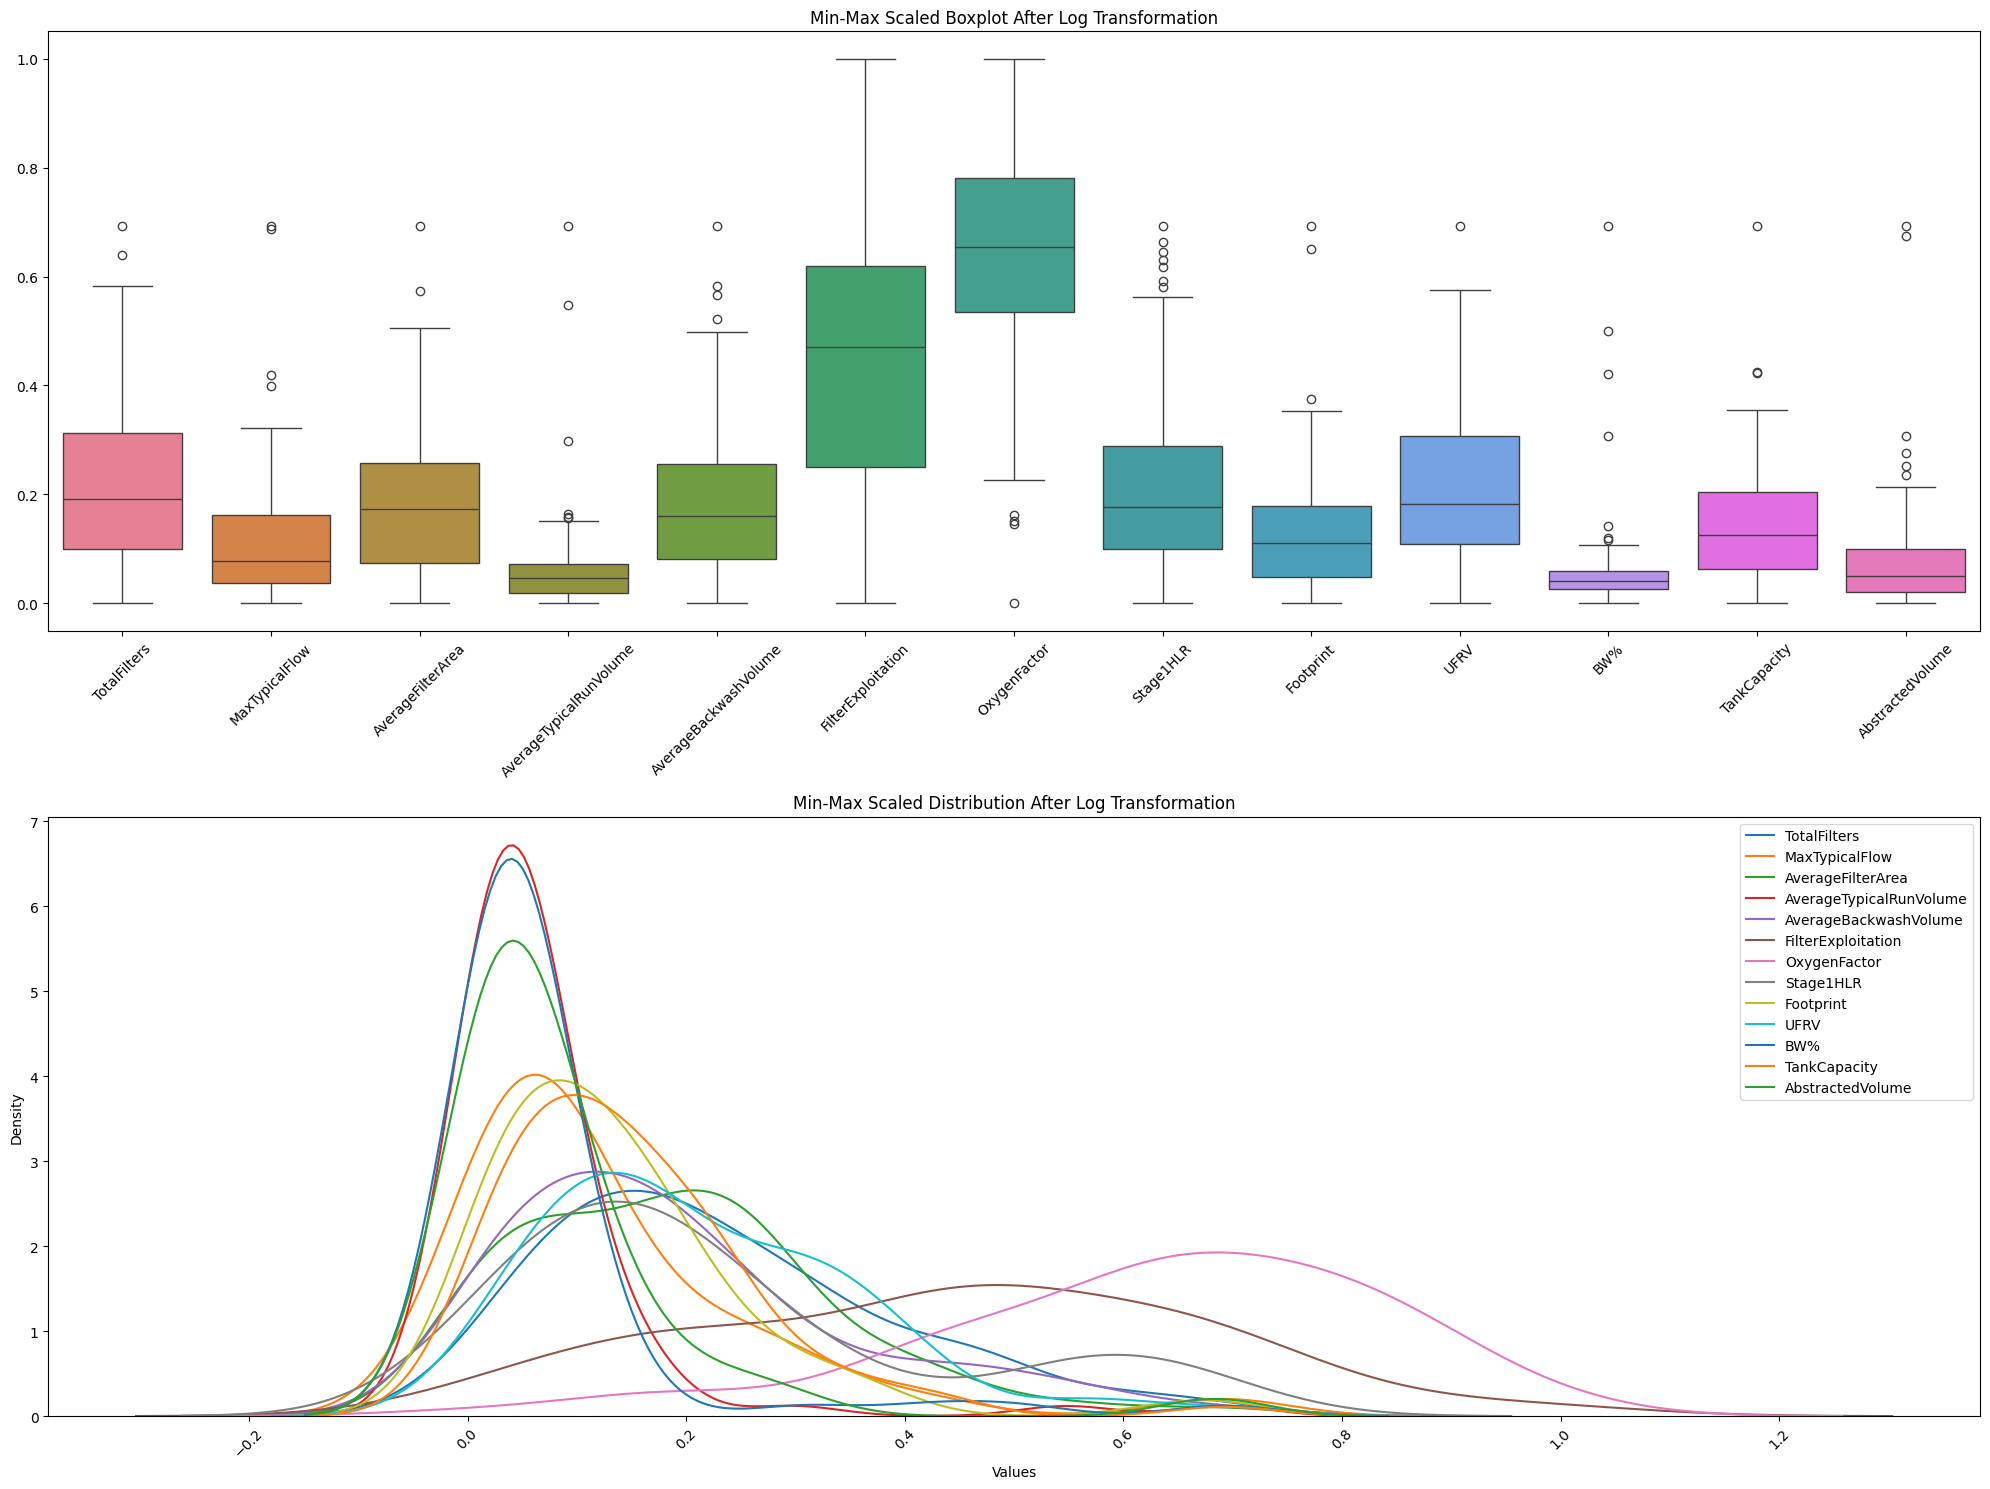

In [97]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

# transforming the skewed columns

# split positively skewed values into highly, slightly, negatively skewed and symmetric
highlyPosSkewed = []
slightlyPosSkewed = []
negativelySkewed = []
relativelySymmetric = []
for feature, skew in skewness.items():
    if skew > 0.5 and skew < 1.0:
        slightlyPosSkewed.append(feature)
    elif skew > 1.0:
        highlyPosSkewed.append(feature)
    elif skew < 0:
        negativelySkewed.append(feature)
    else:
        relativelySymmetric.append(feature)


print(f"Highly skewed: {highlyPosSkewed}")
print(f"Slightly skewed: {slightlyPosSkewed}")
print(f"Negatively skewed: {negativelySkewed}")
print(f"Relatively symmetric: {relativelySymmetric}")

# highly skewed
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), highlyPosSkewed)])
df_log = pd.DataFrame(logTr.fit_transform(min_max_df), columns=highlyPosSkewed)

min_max_df[highlyPosSkewed] = df_log

# Calculate skewness after transformation for each feature in the DataFrame
skewness = min_max_df.apply(lambda x: x.skew())
categorized_skewness = {}
for feature, skew in skewness.items():
    if skew < - 0.5:
        categorized_skewness[feature] = ('Negatively Skewed', skew)
    elif skew > 0.5:
        categorized_skewness[feature] = ('Positively Skewed', skew)
    else:
        categorized_skewness[feature] = ('Approximately Symmetric', skew)

skewness_table = [(feature, category, skew) for feature, (category, skew) in categorized_skewness.items()]
ordered_skewness_table = sorted(skewness_table, key=lambda x: abs(x[2]), reverse=True)
print(tabulate(ordered_skewness_table, headers=["Name", "Skewness", "Skewness value"], tablefmt="grid"))

# Min-Max Scaled Data
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
sns.boxplot(data=min_max_df)
plt.title('Min-Max Scaled Boxplot After Log Transformation')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in min_max_df.columns:
    sns.kdeplot(min_max_df[column], label=column)
plt.title('Min-Max Scaled Distribution After Log Transformation')
plt.xlabel('Values')  
plt.ylabel('Density') 
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As can be seen in the heatmap and bar graph above (PrimaryTrigger, AerationType, GravityPressureMixed, Stages) none of the categorical values are missing - so there is no need to impute them. We use IterativeImputer on the numerical data as the missing data might not be completely random (MAR).

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Impute missing values using IterativeImputer, we're still working with only numeric columns
# 10 iteration gave ConvergenceWarning, so we increased it to 15

imputer = IterativeImputer(max_iter=15, random_state=0)
min_max_df = pd.DataFrame(imputer.fit_transform(min_max_df), columns=min_max_df.columns)
display(min_max_df)


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,AbstractedVolume
0,0.233615,0.030184,0.095533,0.075928,0.053084,0.416917,0.610390,0.037659,0.267436,0.564279,0.009605,0.233779,0.021332
1,0.146603,0.070377,0.074025,0.000796,0.149441,0.472130,0.399351,0.522601,0.018815,0.000000,0.500318,0.000000,0.051530
2,0.146603,0.076922,0.262905,0.055031,0.398030,0.485718,0.880952,0.187702,0.079315,0.175108,0.058259,0.186557,0.057339
3,0.051293,0.084606,0.273668,0.015026,0.139182,0.181225,0.767316,-0.018721,0.352775,0.030962,0.057586,0.101033,0.013042
4,0.051293,0.046835,0.003591,0.000000,0.021689,-0.157247,0.150433,-0.142374,0.651031,0.109846,0.048220,0.424572,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.581922,0.693147,0.693147,0.230053,0.499023,0.748210,0.339827,0.256813,0.035158,0.207780,0.002961,0.067966,0.693147
75,0.693147,0.686535,0.173864,0.065534,0.287460,0.725743,0.816017,0.338665,0.030640,0.313667,0.032407,0.036246,0.674056
76,0.233615,0.158319,0.253103,0.032633,0.263025,0.039153,0.442641,0.125000,0.375638,0.102265,0.116733,0.191337,0.035748
77,0.456758,0.250138,0.573622,0.064040,0.581843,0.312856,0.870130,0.020258,0.283256,0.047284,0.693147,0.121455,0.124298


Next, we create a correlation matrix with a dataframe containing only numerical data that has been imputed using IterativeImputer. The highest positive correlation can be seen in these cases: 
- MaxTypicalFlow and AbstractVolume (0.92)
- AverageBackwashVolume and AverageFilterArea (0.84)
- TotalFilters and AbstractedVolume (0.7)
- TotalFilters and MaxTypicalFlow (0.69)

The highest negative correlation is between Footprint and Stage1HLR (-0.71). 
We set the remove-threshold to 0.9 so one of the MaxTypicalFlow and AbstractVolume can be removed. We don't remove the negative correlation.

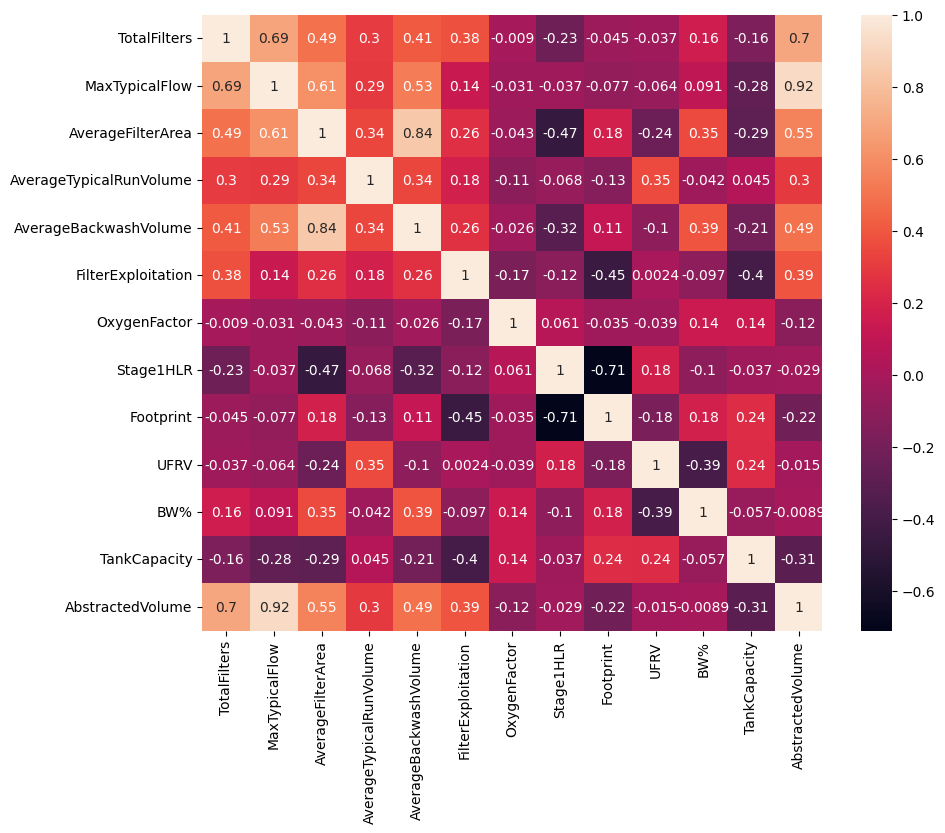

In [99]:
plt.figure(figsize=(10, 8))
correlation_matrix = min_max_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()




We remove the highly correlated MaxTypicalFlow and check for any duplicates - there are none.

In [100]:
columnsToDrop = ['MaxTypicalFlow']
cleanDf = min_max_df.drop(columns=columnsToDrop)

duplicate_rows = cleanDf[cleanDf.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  0


In the last step, we introduce the categorical data back into the dataframe and encode it. 
We use one-hot encoding for features 'PrimaryTrigger', 'GravityPressureMixed', and 'AerationType' as they have high cardinality and are nominal - there is no natural order or hierarchy to them.
We use label encoding for 'Stages' feature since it's ordinal - there is a natural order. The last print shows the final dataframe that's we declare clean - with cleaned, transformed, and scaled numerical data and encoded categorical data.

In [101]:
from sklearn.preprocessing import LabelEncoder

# Drop the columns with numerical data from relevantColumnsDf
objectColumns = relevantColumnsDf.select_dtypes(include=['object'])

#Concat cleanDf and objectColumns
complete_df = pd.concat([cleanDf, objectColumns], axis=1)
# display(complete_df)

# Encode the categorical columns using one-hot encoding
df_encoded = pd.get_dummies(complete_df, columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType'])
# display(df_encoded)

# Encode 'Stages' with label encoding
label_encoder = LabelEncoder()
df_encoded['Stages'] = label_encoder.fit_transform(df_encoded['Stages'])

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df_encoded)



    TotalFilters  AverageFilterArea  AverageTypicalRunVolume  \
0       0.233615           0.095533                 0.075928   
1       0.146603           0.074025                 0.000796   
2       0.146603           0.262905                 0.055031   
3       0.051293           0.273668                 0.015026   
4       0.051293           0.003591                 0.000000   
..           ...                ...                      ...   
74      0.581922           0.693147                 0.230053   
75      0.693147           0.173864                 0.065534   
76      0.233615           0.253103                 0.032633   
77      0.456758           0.573622                 0.064040   
78      0.191055           0.289854                 0.038055   

    AverageBackwashVolume  FilterExploitation  OxygenFactor  Stage1HLR  \
0                0.053084            0.416917      0.610390   0.037659   
1                0.149441            0.472130      0.399351   0.522601   
2        